In [2]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("1984.xlsx")
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1984,17473,439,25,3512
1,1984,17910,262,41,3540
2,1984,17606,183,27,3561
3,1984,17602,109,40,3520
4,1984,17128,433,25,3537
...,...,...,...,...,...
1839,1984,17808,368,28,3505
1840,1984,17067,120,33,3513
1841,1984,17585,287,17,3504
1842,1984,17049,50,37,3555


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1844, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1844 non-null   int64
 1   Maximum length (m))  1844 non-null   int64
 2   Recession(m),        1844 non-null   int64
 3   Rate/yr(m)           1844 non-null   int64
 4   Snout altitude (m)   1844 non-null   int64
dtypes: int64(5)
memory usage: 72.2 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1844


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1984,17473,439,25,3512
1,1984,17910,262,41,3540
2,1984,17606,183,27,3561
3,1984,17602,109,40,3520
4,1984,17128,433,25,3537


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0144,-0.0010,-0.0214
"Recession(m),",NaN,0.0144,1.0000,-0.0170,0.0011
Rate/yr(m),NaN,-0.0010,-0.0170,1.0000,0.0189
Snout altitude (m),NaN,-0.0214,0.0011,0.0189,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Recession(m),          0.0144
Rate/yr(m)            -0.0010
Snout altitude (m)    -0.0214
Year                      NaN
Name: Maximum length (m)), dtype: float64

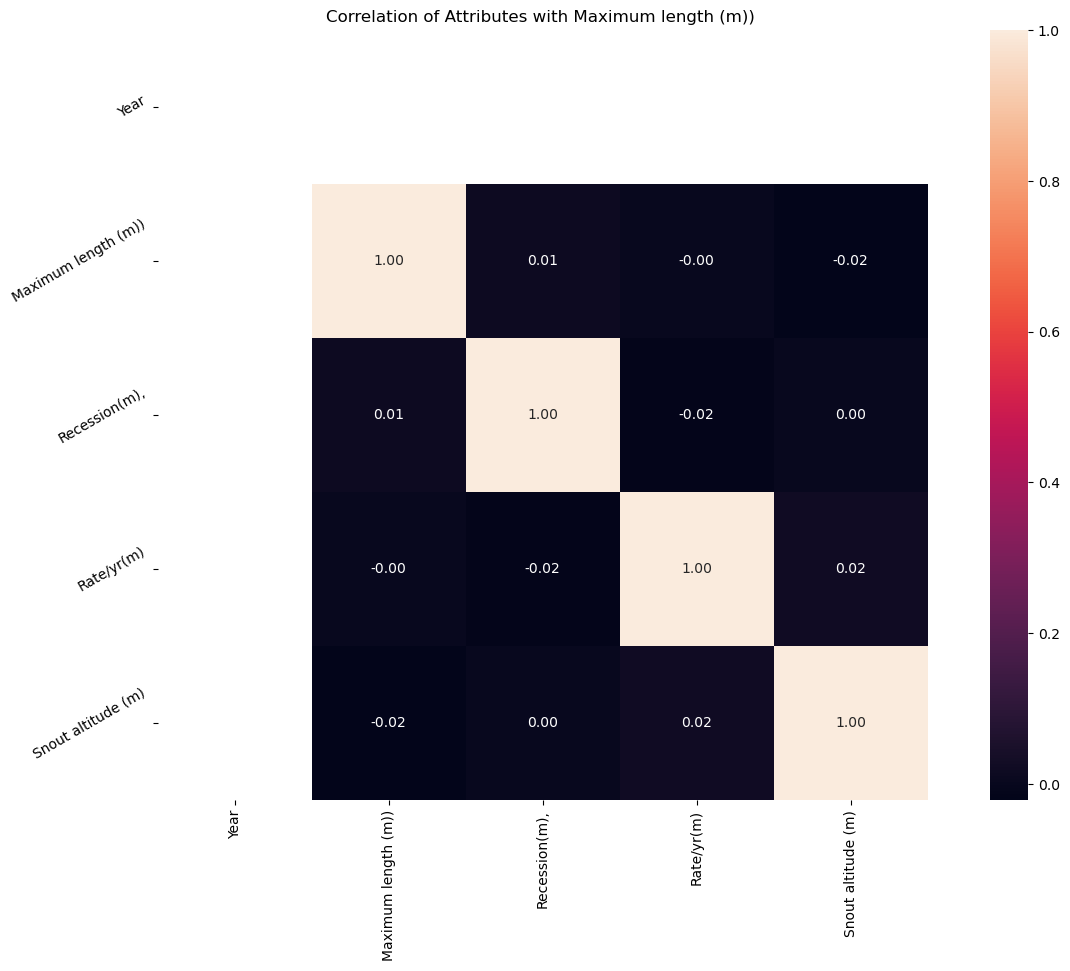

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,844.0000","1,844.0000","1,844.0000","1,844.0000","1,844.0000"
mean,"1,984.0000","17,548.9631",225.3671,27.8091,"3,531.7451"
std,0.0000,298.9878,128.3515,8.6823,20.3698
min,"1,984.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"1,984.0000","17,296.0000",112.7500,20.0000,"3,515.0000"
50%,"1,984.0000","17,554.0000",228.0000,28.0000,"3,531.0000"
75%,"1,984.0000","17,808.0000",335.0000,36.0000,"3,549.0000"
max,"1,984.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

Year
1984   1.0000
Name: count, dtype: float64

Recession(m),
353   0.0070
39    0.0065
370   0.0054
86    0.0054
211   0.0054
       ...  
177   0.0005
127   0.0005
375   0.0005
410   0.0005
119   0.0005
Name: count, Length: 431, dtype: float64

Rate/yr(m)
38   0.0390
37   0.0385
27   0.0380
42   0.0380
28   0.0369
26   0.0363
21   0.0358
34   0.0352
39   0.0347
17   0.0347
31   0.0347
41   0.0342
25   0.0342
40   0.0342
36   0.0342
30   0.0336
24   0.0331
14   0.0325
16   0.0325
15   0.0325
32   0.0325
23   0.0320
18   0.0315
13   0.0309
29   0.0304
33   0.0287
20   0.0287
19   0.0282
22   0.0282
35   0.0260
Name: count, dtype: float64

Snout altitude (m)
3519   0.0190
3524   0.0184
3564   0.0179
3497   0.0179
3549   0.0179
        ...  
3551   0.0092
3532   0.0092
3562   0.0092
3504   0.0092
3496   0.0011
Name: count, Length: 72, dtype: float64



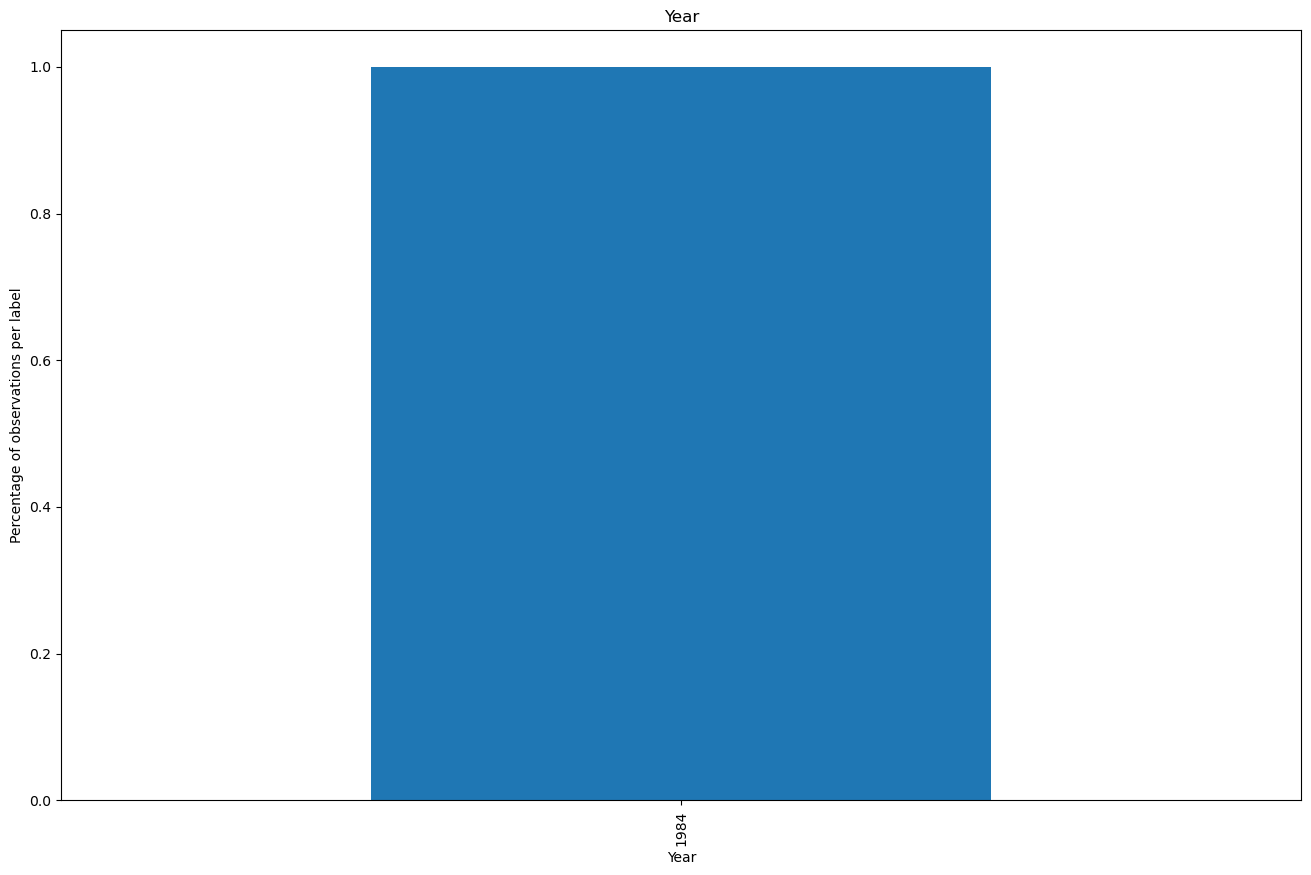

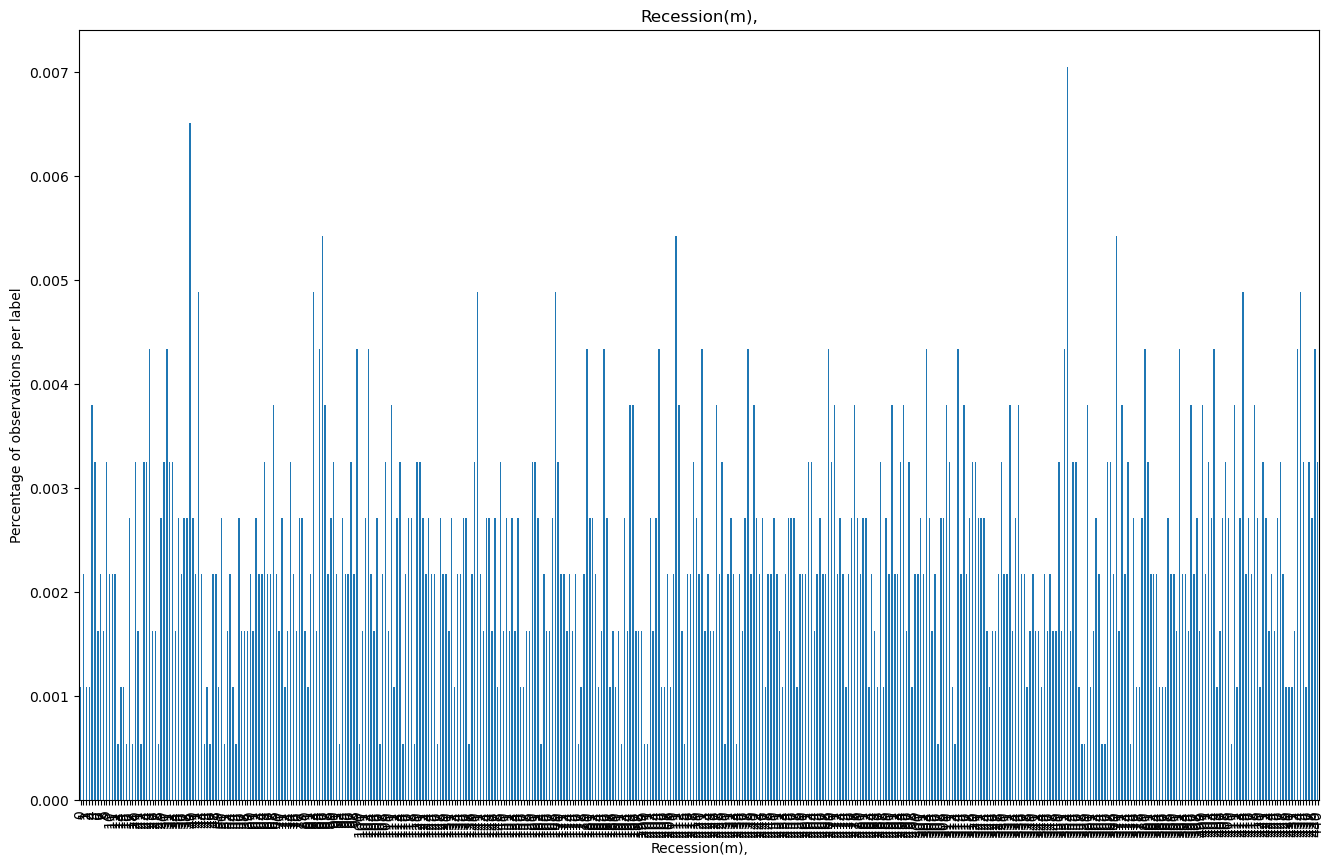

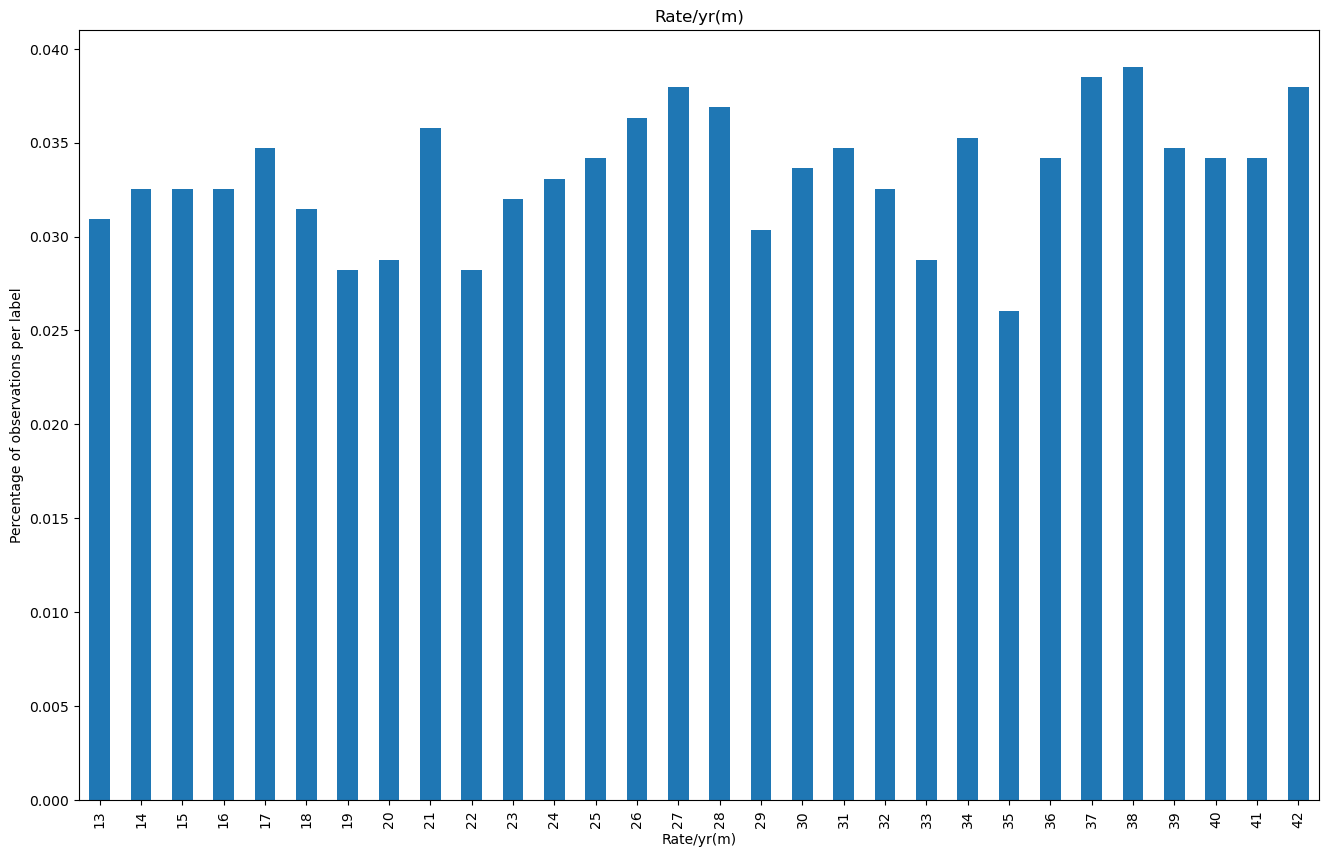

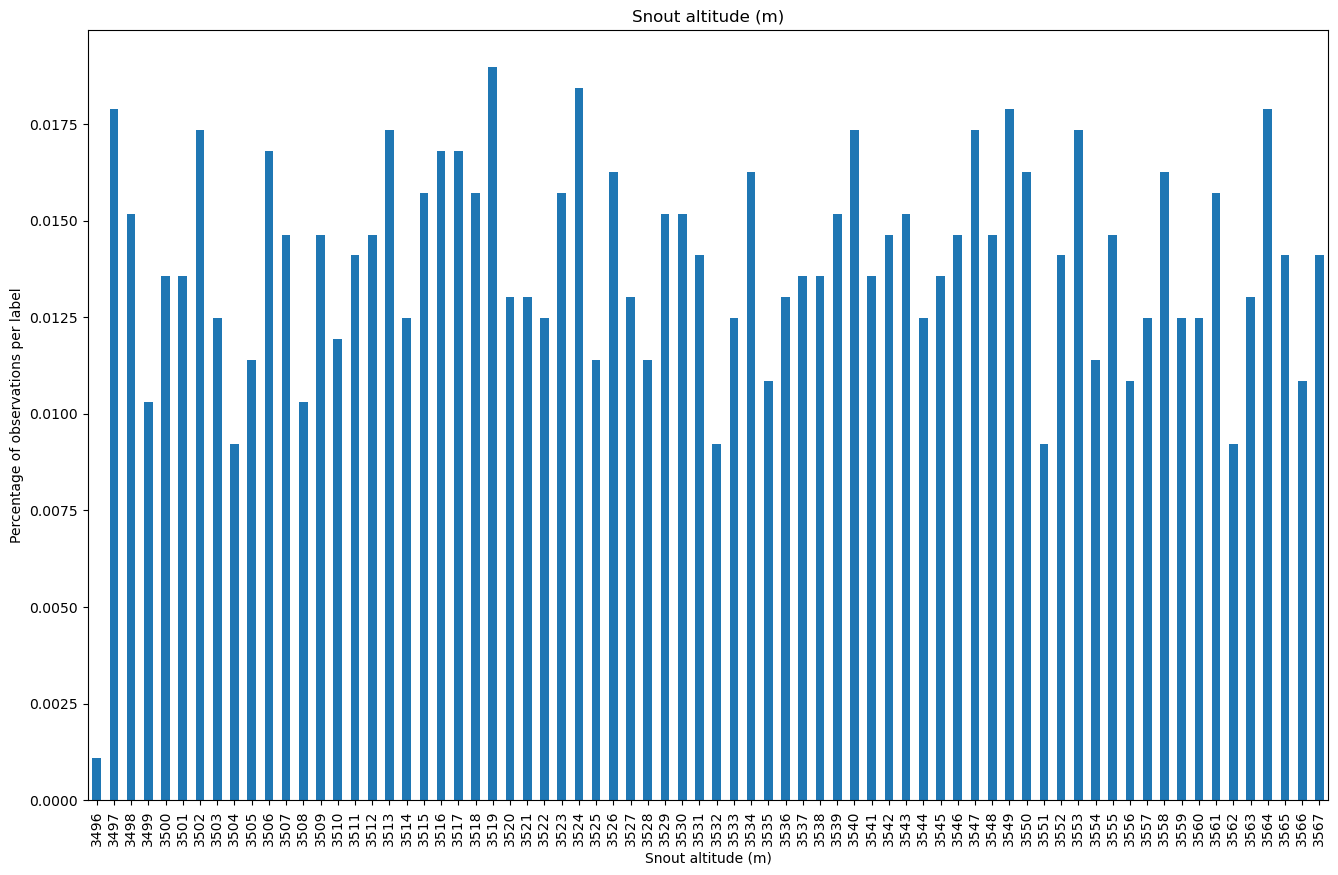

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()